In [ ]:
import pandas as pd
csv = pd.read_csv("data/dataset.csv")
csv.head()
print(csv.describe())
print(csv.info())
print(csv.shape)
print(csv.columns)
print(csv.isnull().sum())
csv.dtypes


(1000, 9)
Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')
Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64


Order_ID                    int64
Distance_km               float64
Weather                    object
Traffic_Level              object
Time_of_Day                object
Vehicle_Type               object
Preparation_Time_min        int64
Courier_Experience_yrs    float64
Delivery_Time_min           int64
dtype: object

In [3]:
cat_cols = ['Weather','Traffic_Level','Time_of_Day']
for col in cat_cols :
    csv[col].fillna(csv[col].mode()[0],inplace=True)
csv["Courier_Experience_yrs"] = csv["Courier_Experience_yrs"].fillna(csv["Courier_Experience_yrs"].mean())

print(csv.isnull().sum())

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_13356\1475099364.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  csv[col].fillna(csv[col].mode()[0],inplace=True)


In [8]:
csv.duplicated().any()

np.False_

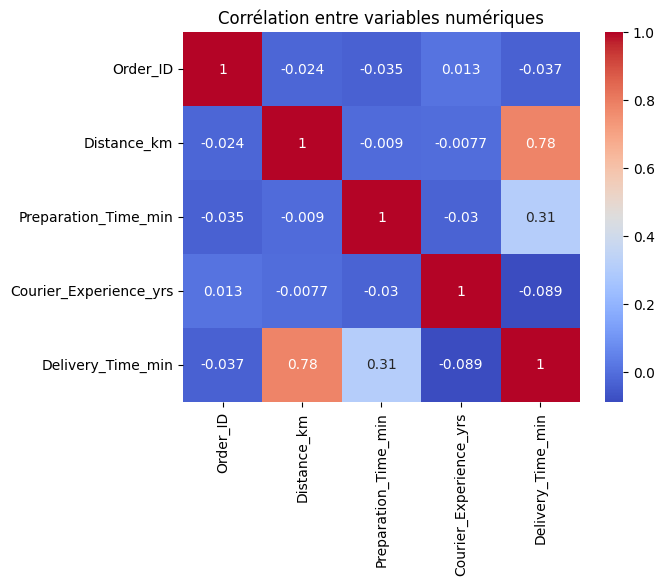

In [ ]:
# Heatmap de corrélation des variables numériques
import seaborn as sns
import matplotlib.pyplot as plt
#correlation
sns.heatmap(csv.corr(numeric_only=True),annot=True,cmap="coolwarm")
plt.title("Corrélation entre variables numériques")
plt.show()

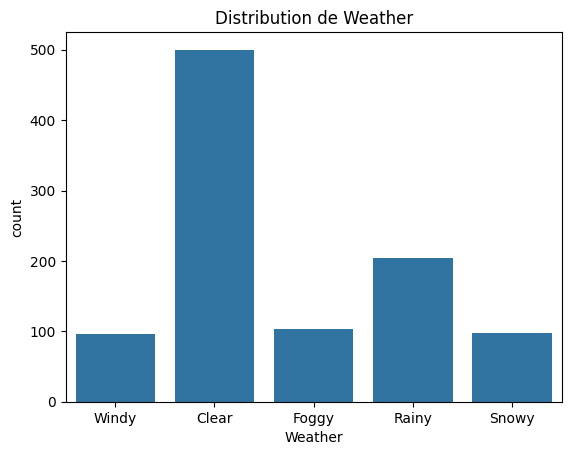

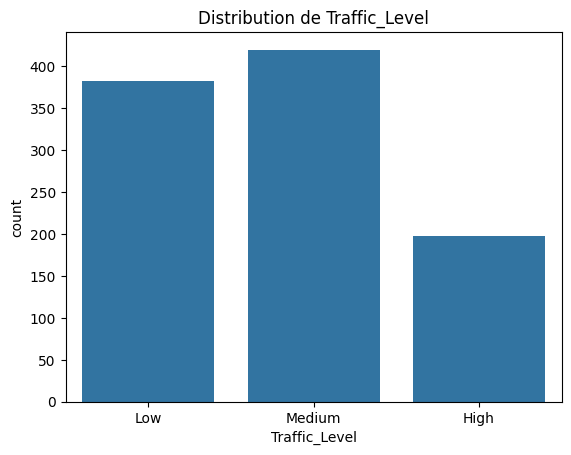

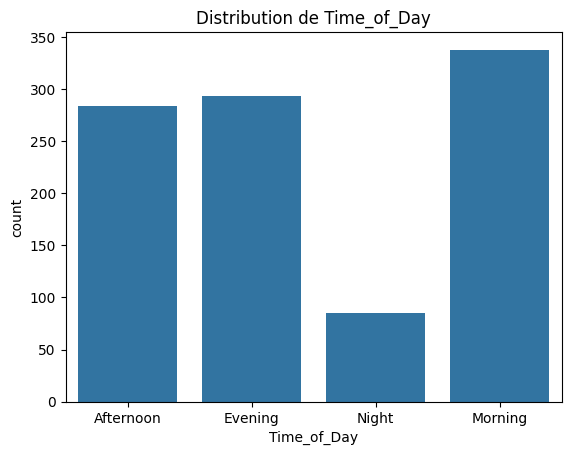

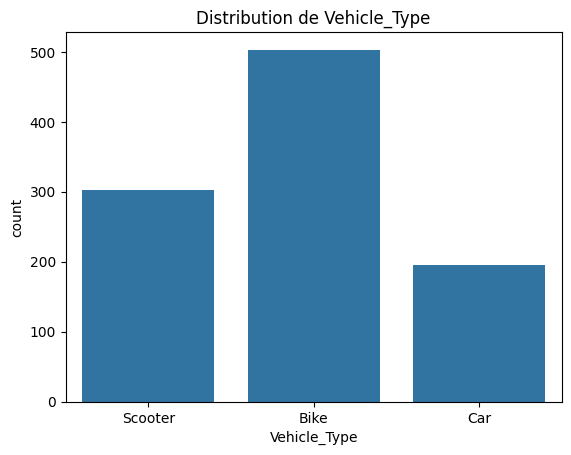

In [ ]:
# Countplots pour visualiser la distribution des variables catégorielles
cat_cols = csv.select_dtypes(include=['object']).columns
for col in cat_cols:
 if col != 'Order_ID':
   sns.countplot(data=csv,x=col)
   plt.title(f'Distribution de {col}')
   plt.show()

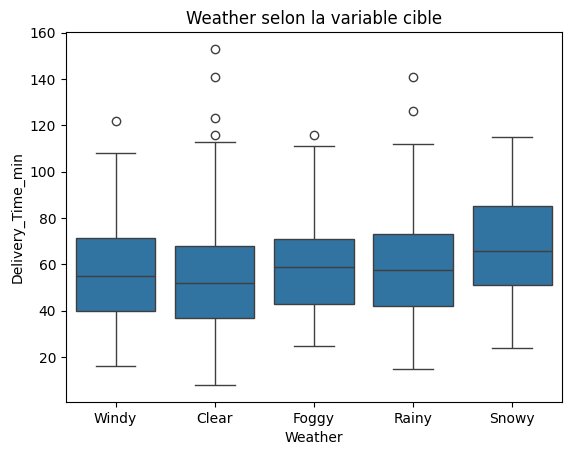

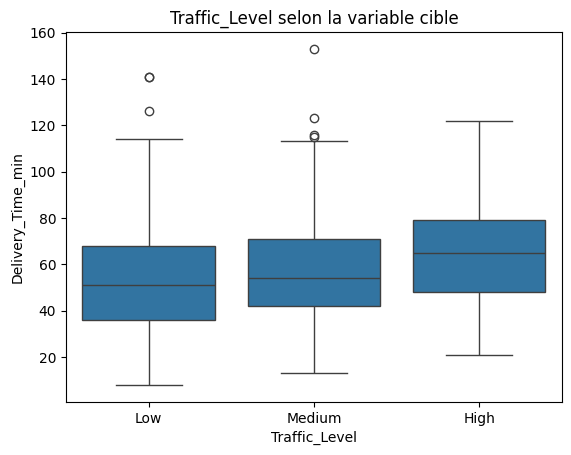

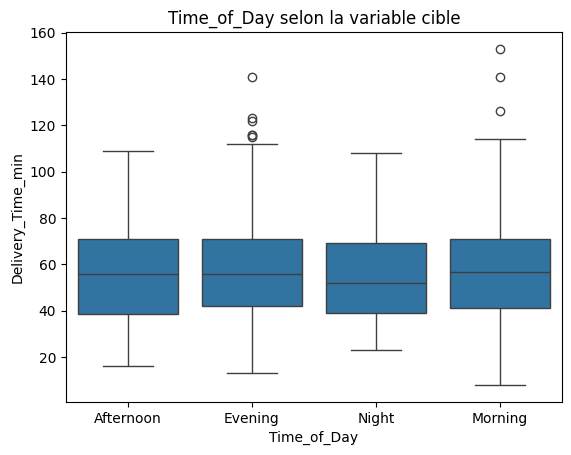

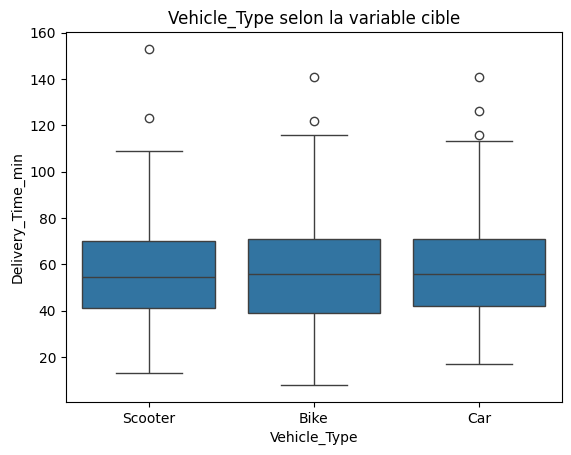

In [7]:
# Boxplots pour analyser la relation entre la cible et les variables catégorielles
for col in cat_cols :
  if col != 'Order_ID':   
    sns.boxplot(x=col,y="Delivery_Time_min",data=csv)
    plt.title(f"{col} selon la variable cible")
    plt.show()